In [1]:
#import modules
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 11)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#loading after-cleaned data
df = pd.read_csv("./data_cleaning.csv")

C:\Users\Lydia Kan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#using the most current month for EDA
m17 = df[df.month_id == 17]
len(m17)

931453

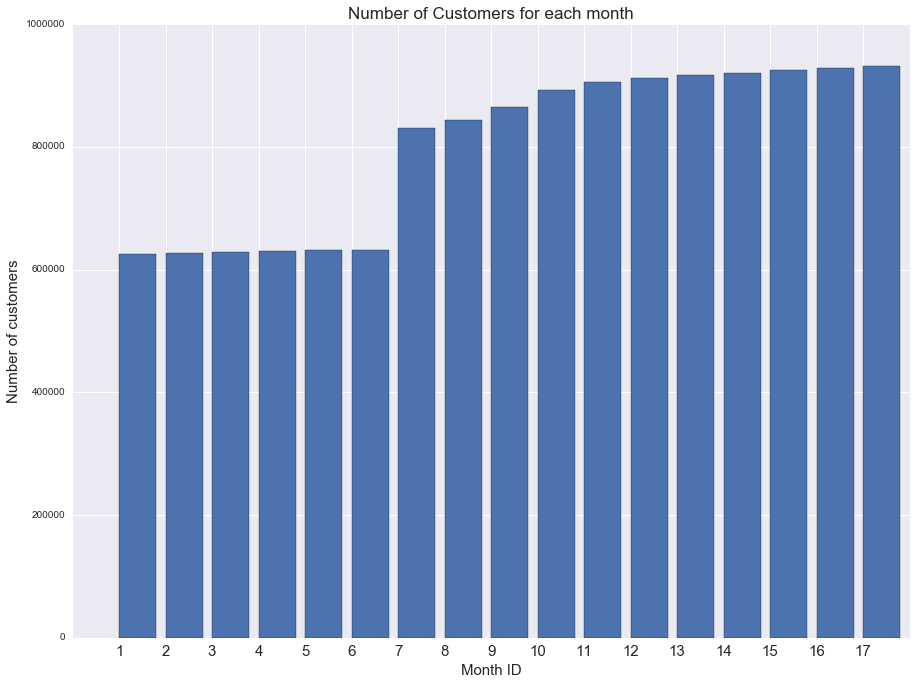

In [4]:
#See how many unique customers for each month
customers=[]
for i in range(1,18):
    number = len(df[df.month_id == i])
    customers.append(number)

customer_permonth = pd.DataFrame({'month_id': df.month_id.unique(), 'number_customer': customers})
customer_permonth

plt.bar(customer_permonth.month_id, customer_permonth.number_customer,)
plt.xticks(np.arange(1,18), fontsize = 15)
plt.xlabel('Month ID',fontsize = 15)
plt.ylabel('Number of customers',fontsize = 15)
plt.title('Number of Customers for each month',fontsize = 17)

In [5]:
#see the unique month id
df.month_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17], dtype=int64)

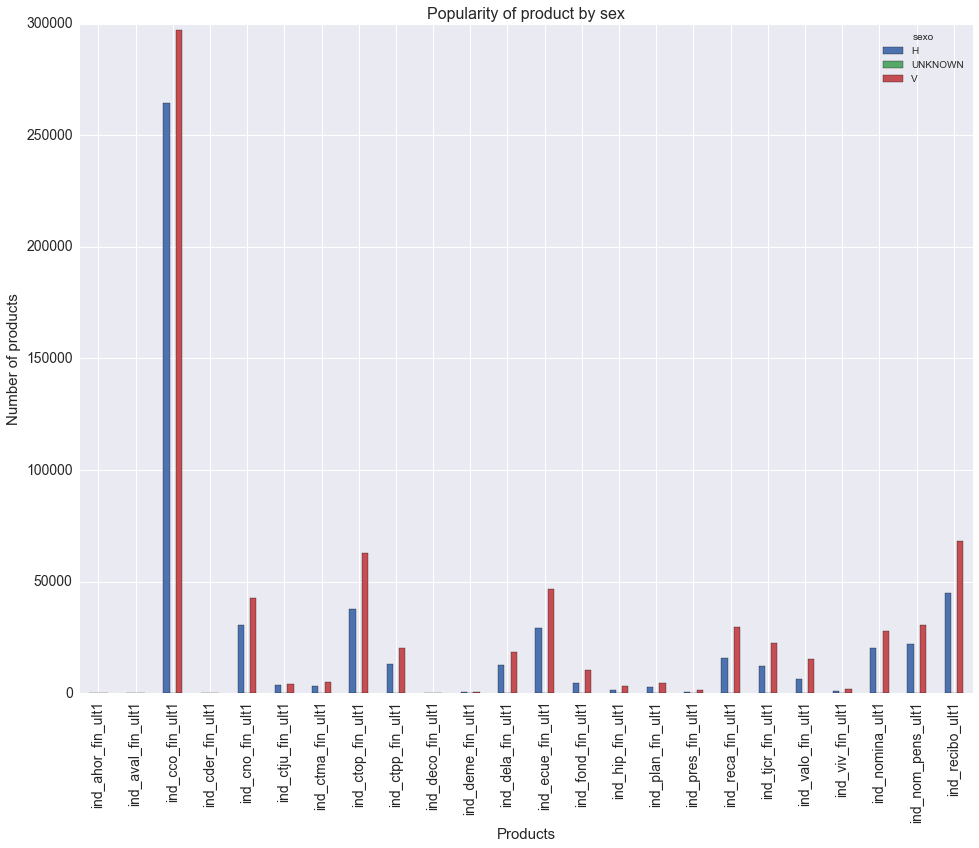

In [6]:
#see product own by sex in month 17
sexo_p = m17.loc[:, ['sexo' ]].join(m17.loc[: ,"ind_ahor_fin_ult1": "ind_recibo_ult1"])
sexo_p = sexo_p.groupby(['sexo']).sum()
sexo_p = sexo_p.T
sexo_p.plot(kind='bar' , stacked=False, fontsize=14, figsize=[16,12])
plt.title('Popularity of product by sex', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

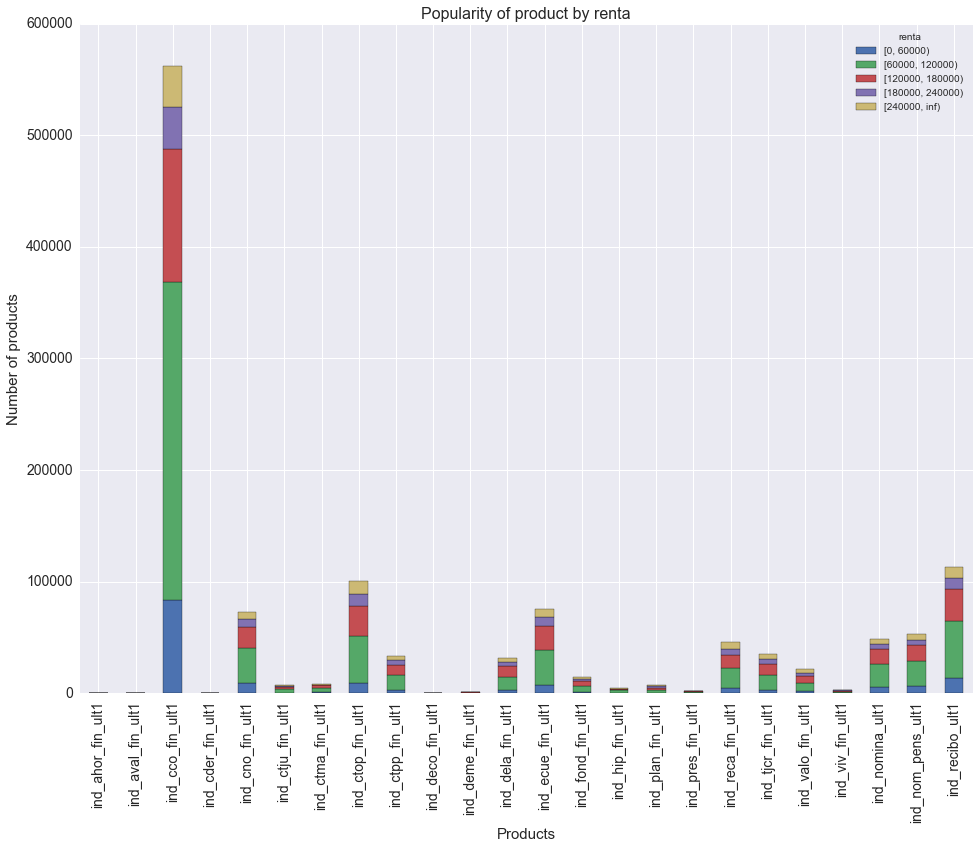

In [7]:
#see product own by rent in month 17
renta_p = (m17.groupby(pd.cut(m17['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum())
renta_p = renta_p.loc[: ,"ind_ahor_fin_ult1": "ind_recibo_ult1"]
renta_p= renta_p.T
renta_p.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12])
plt.title('Popularity of product by renta', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

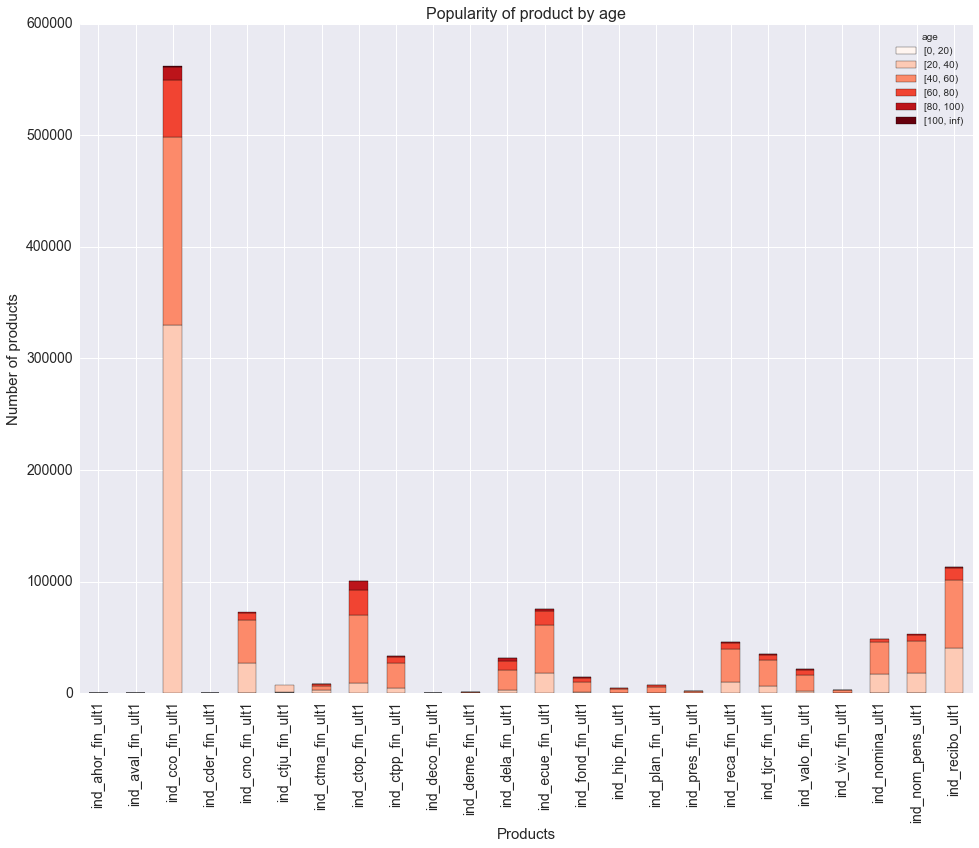

In [8]:
#see product own by age range in month 17
age_p = (m17.groupby(pd.cut(m17['age'], [0,20,40,60,80,100, pd.np.inf], right=False)).sum())
age_p = age_p.loc[: ,"ind_ahor_fin_ult1": "ind_recibo_ult1"]
age_p= age_p.T
age_p.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12], colormap = 'Reds')
plt.title('Popularity of product by age', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

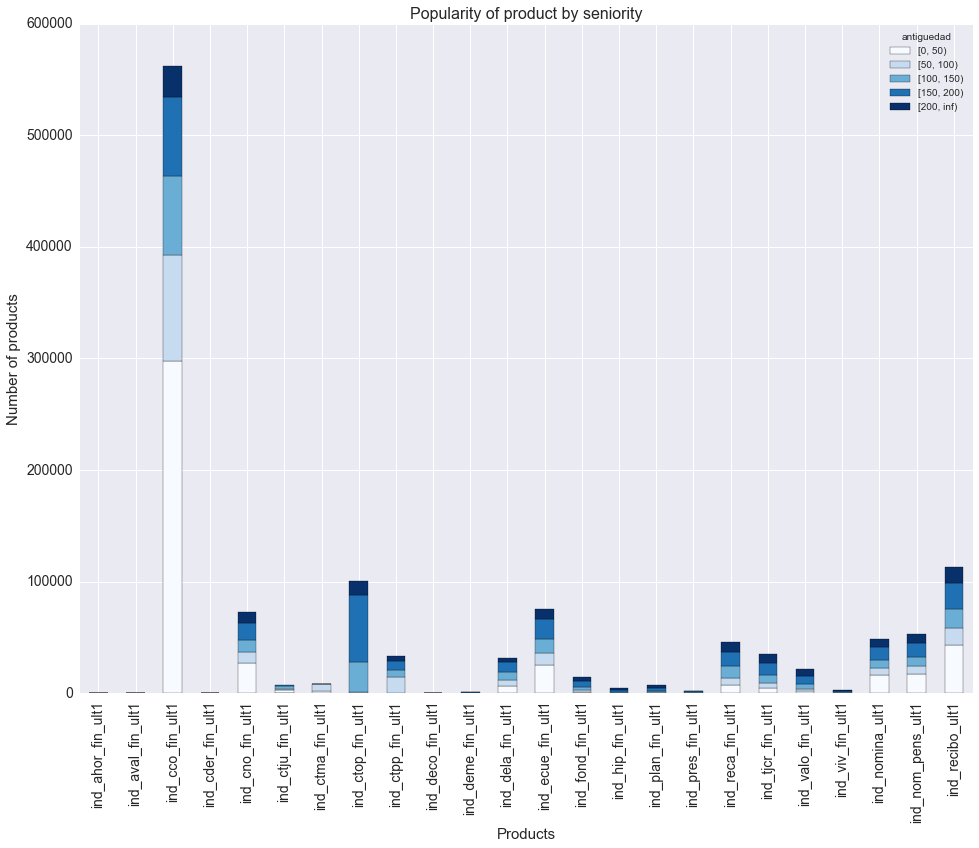

In [9]:
#see product own by seniority in month 17
sen_p = (m17.groupby(pd.cut(m17['antiguedad'], [0,50,100,150,200, pd.np.inf], right=False)).sum())
sen_p = sen_p.loc[: ,"ind_ahor_fin_ult1": "ind_recibo_ult1"]
sen_p= sen_p.T
sen_p.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12], colormap = 'Blues')
plt.title('Popularity of product by seniority', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

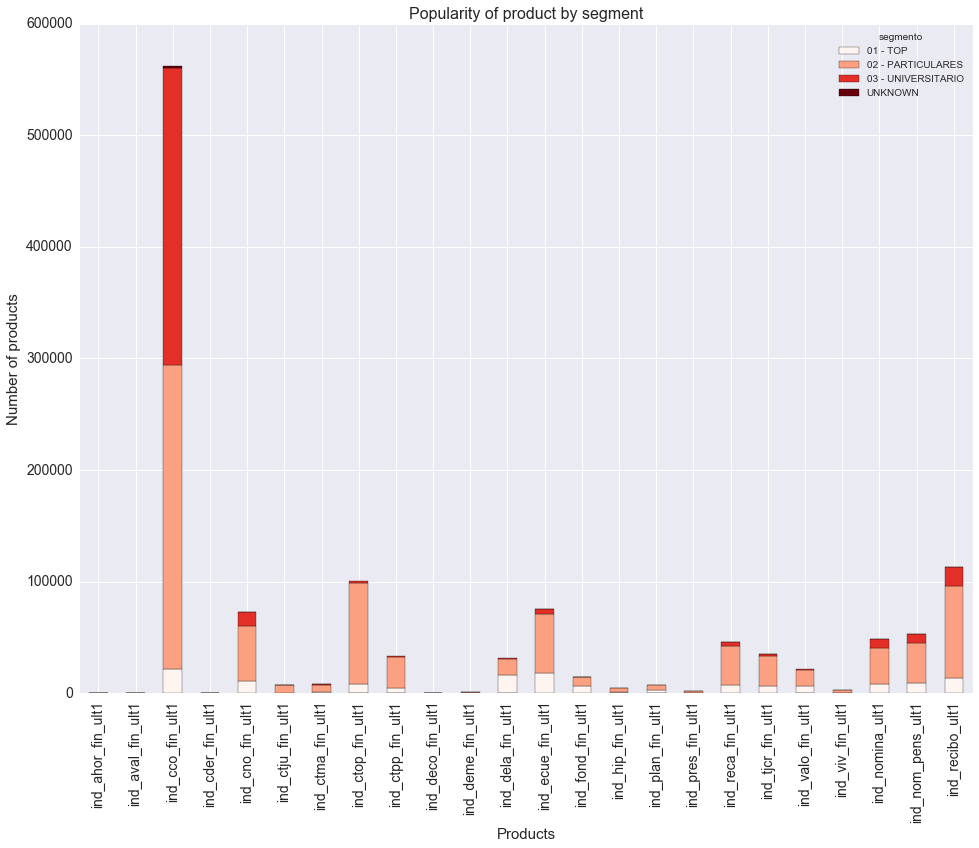

In [10]:
#see product own by segment in month 17
seg_p = m17.loc[:, ['segmento']].join(m17.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
seg_p= seg_p.groupby('segmento').agg('sum')
seg_p= seg_p.T
seg_p.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12], colormap = 'Reds')
plt.title('Popularity of product by segment', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

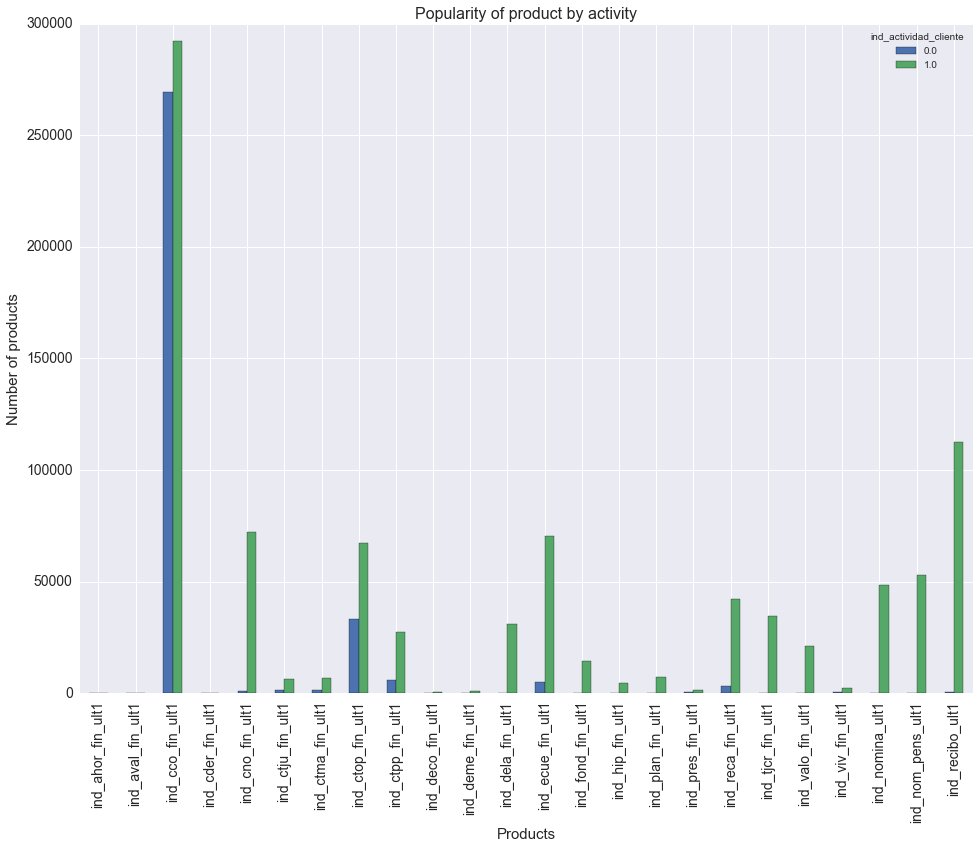

In [11]:
#see product own by activity in month 17
ac_p = m17.loc[:, ['ind_actividad_cliente']].join(m17.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
ac_p= ac_p.groupby('ind_actividad_cliente').agg('sum')
ac_p= ac_p.T
ac_p.plot(kind='bar' , stacked=False, fontsize=14, figsize=[16,12])
plt.title('Popularity of product by activity', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

In [12]:
#create total product
m17['tot_p'] = m17.loc[: ,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
m17['tot_p'] = pd.to_numeric(m17['tot_p'], errors ='coerce')

C:\Users\Lydia Kan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Lydia Kan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


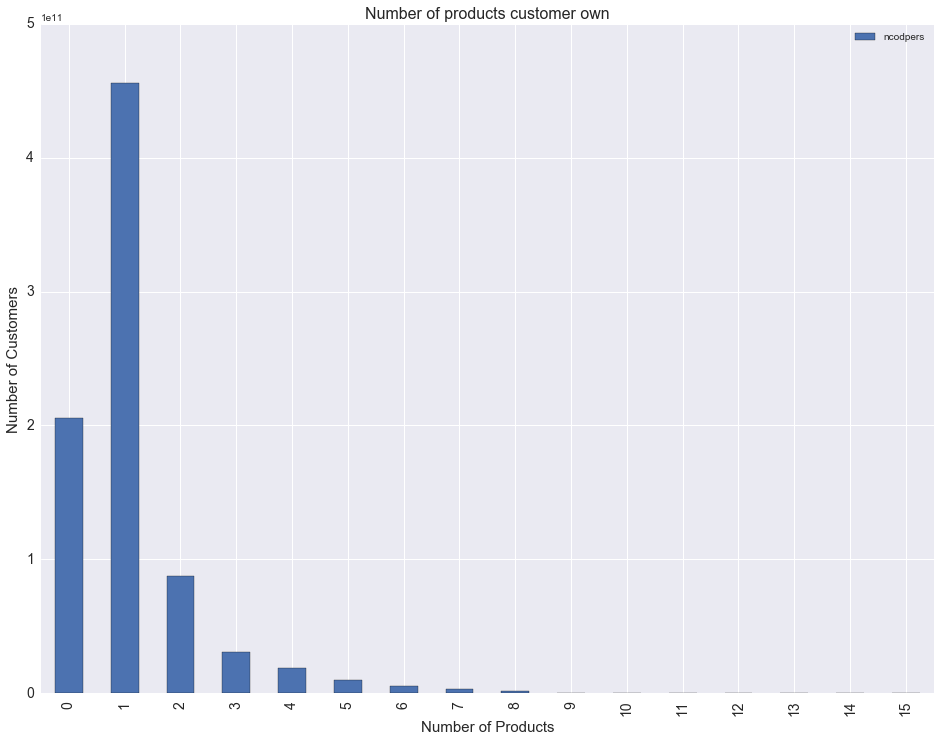

In [13]:
#see how many products own of each customers
product_n_own = m17.loc[:, ['tot_p' ]].join(m17.loc[: ,"ncodpers"])
product_n_own = product_n_own.groupby(['tot_p']).sum()
product_n_own.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12])
plt.title('Number of products customer own', fontsize = 16)
plt.xlabel('Number of Products',fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

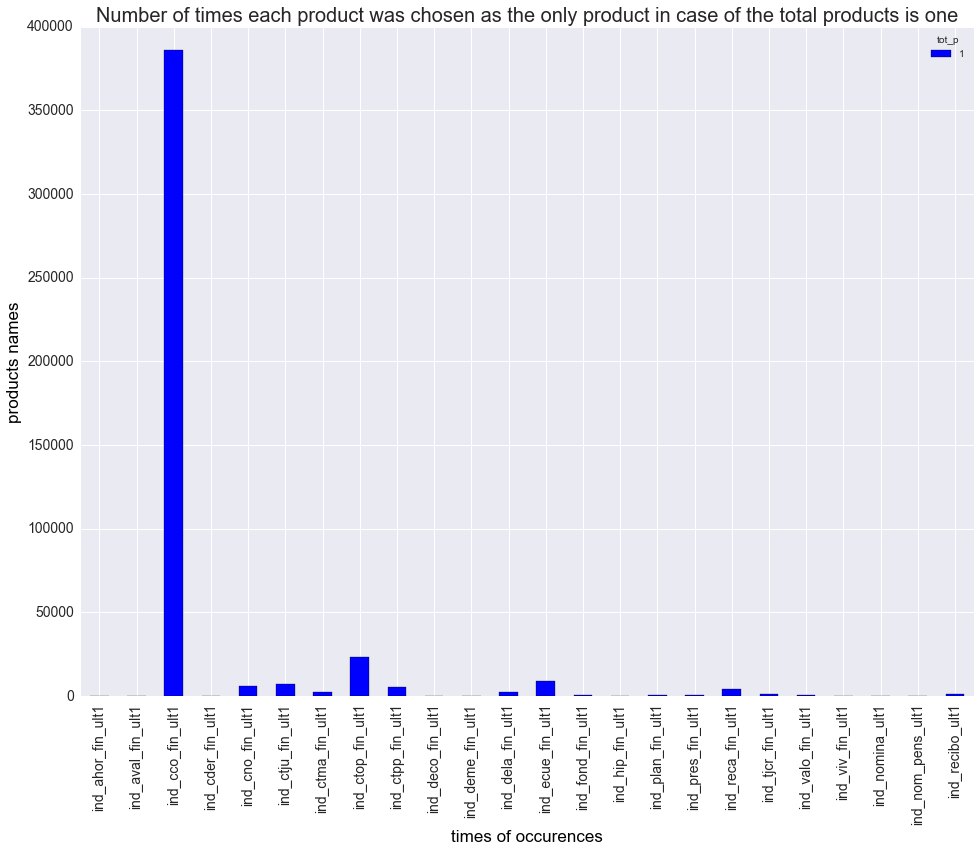

In [14]:
#see which product is the popular one when customers only own one product
p1 = m17[m17["tot_p"]==1]  # cases where the total products is one
p1 = p1.loc[:, ["tot_p"]].join(p1.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 
p1= p1.groupby("tot_p").agg("sum")
p1= p1.T
p1.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen as the only product in case of the total products is one', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black')

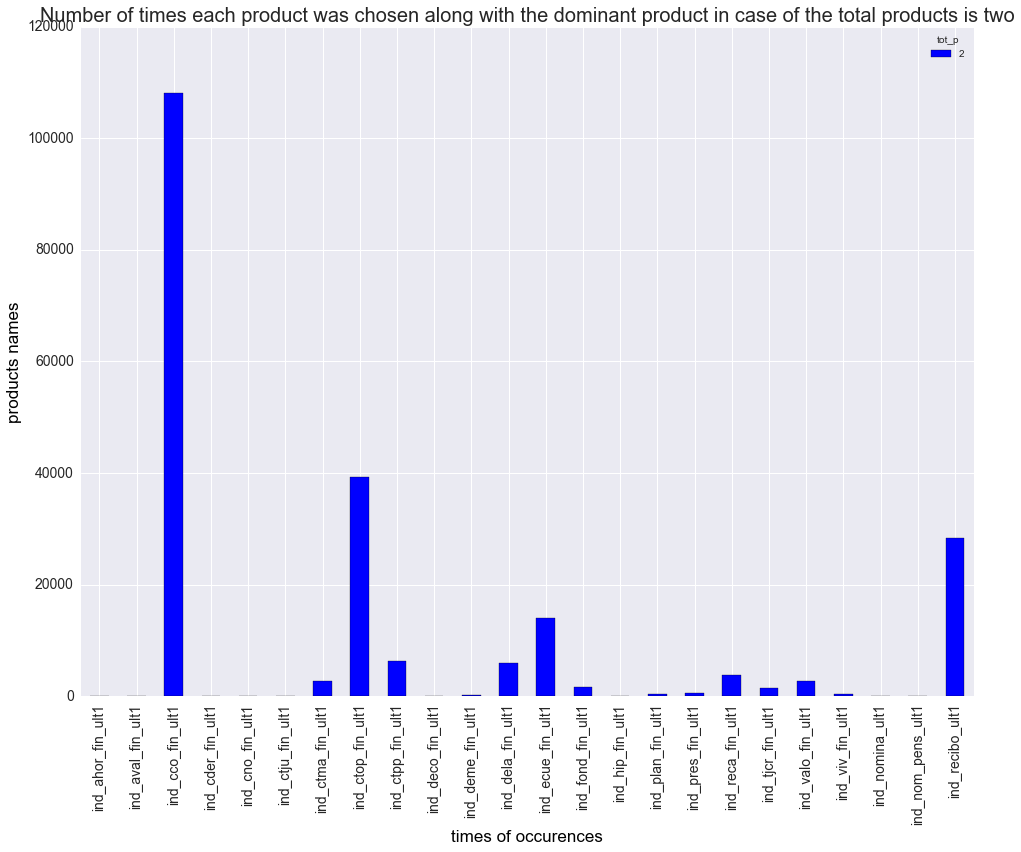

In [15]:
#see which product is second product that the customer own when they also own the dominated product, when they own two product
p2 = m17[m17["tot_p"]==2]
p2 = p2[p2['ind_cco_fin_ult1']==1]
p2 = p2.loc[:, ["tot_p"]].join(p2.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 
p2= p2.groupby("tot_p").agg("sum")
p2= p2.T
p2.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen along with the dominant product in case of the total products is two', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black')

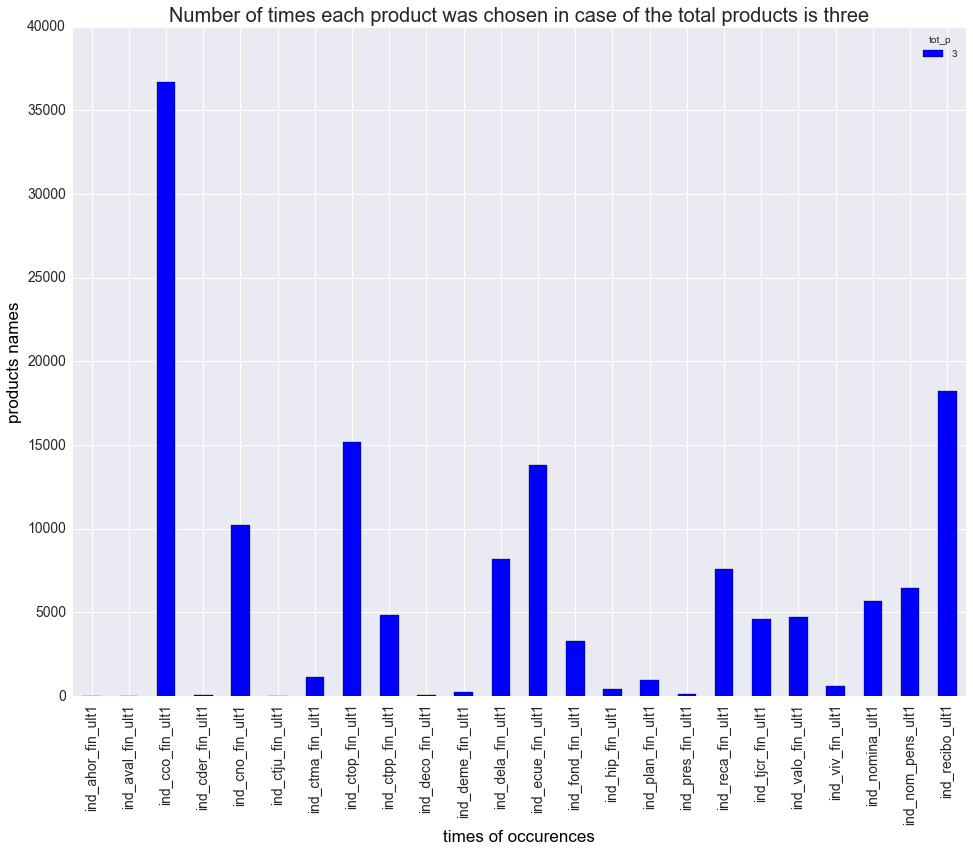

In [16]:
#see which products is the popular one when customers only own one product
p3 = m17[m17["tot_p"]==3]
p3 = p3.loc[:, ["tot_p"]].join(p3.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 
p3= p3.groupby("tot_p").agg("sum")
p3= p3.T
p3.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen in case of the total products is three', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black')